# Coursework A: Curve Fitting

Many people work with data, trying to understand what it means. Among them are scientists, who perform experiments and then analyze their results. A popular way of analyzing data is curve fitting, which can be done in many ways. In this notebook, we will specifically look at the $\chi^2$ test and Mean Squared Error (MSE), and explore gradient descent, which is a stochastic method that combines both to create best-fit curves.

We're gonna first look at the first-order polynomial 1 + 3x and add a Gaussian Noise to it, basically superimposing a bell curve onto our data.

Then we're going to implement the stochastic gradient function. We would do this by miniming the MSE, plotting each result we get. Finally we would use our stochastic gradient function on a 3rd order polynomial. We're going to use an extended range, which includes a trained and untrained region, which would allow us to compare and comment how well the model works in either region.

## Import libraries




In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl

#Set default figure size
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch


## Defining our Functions

The polynomials which we will use will be in the form

$$y(x) = \sum_i \theta_i x^i $$

where $\theta_i$ represents the coefficient of the $i^{th}$ order of the polynomial and $x$ is the argument of the function.

A Gaussian with a mean $\mu$ and standard deviation $\sigma$, is given by

$$P(x; \mu, \sigma) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2} $$

Throughout this notebook we will be working with a mean $\mu=0$ and standard deviation $\sigma=0.5$. The noise for our polynomial will be values randomly picked from the Gaussian.

In [31]:
def polyModel(x,theta):

    """
    For an array called x, apply the following function to each value:

    y(x) = Σ_i θ_i x ^ i

    where i iterates through each value in the theta array.

    Input:
    x - Value or 1D Numpy Array
    Theta - Value or 1D Numpy Array of coefficients

    Output:
    1D Numpy Array of values y(x)
    """
    y = 0 # Starts at Zero

    for i, value in enumerate(theta): # Iterate over index and value
        y += value * x ** i

    return y

In [32]:
def polyModelWithNoise(x,theta,sigma):

    """

    For an array called x, apply the following function to each value:

    y(x) = Σ_i θ_i x ^ i

    where i iterates through each value in the theta array.

    Then add a Gaussian noise with a standard deviation of sigma and mean of 0.

    Returns an array of values y(x)

    Input:
    x - Value or 1D Numpy Array
    Theta - Value or 1D Numpy Array of coefficients
    sigma - Standard deviation of the noise

    Output:
    1D Numpy Array of values y(x)

    """

    polymodel = polyModel(x,theta)

    noise = np.random.normal(0,sigma,len(x)) # Add Noise to polynomial

    return polymodel + noise


## Plotting first order polynomial

We're going to now plot our polynomial $1+3x$ in the domain 0 < $x$ < 1. We will do this by using our polynomial function and creating two arrays: $\theta$ = `[1,3]` and x which is 100 values evenly spaced between 0 and 1. We will also plot the polynomial with a Gaussian noise added to it.

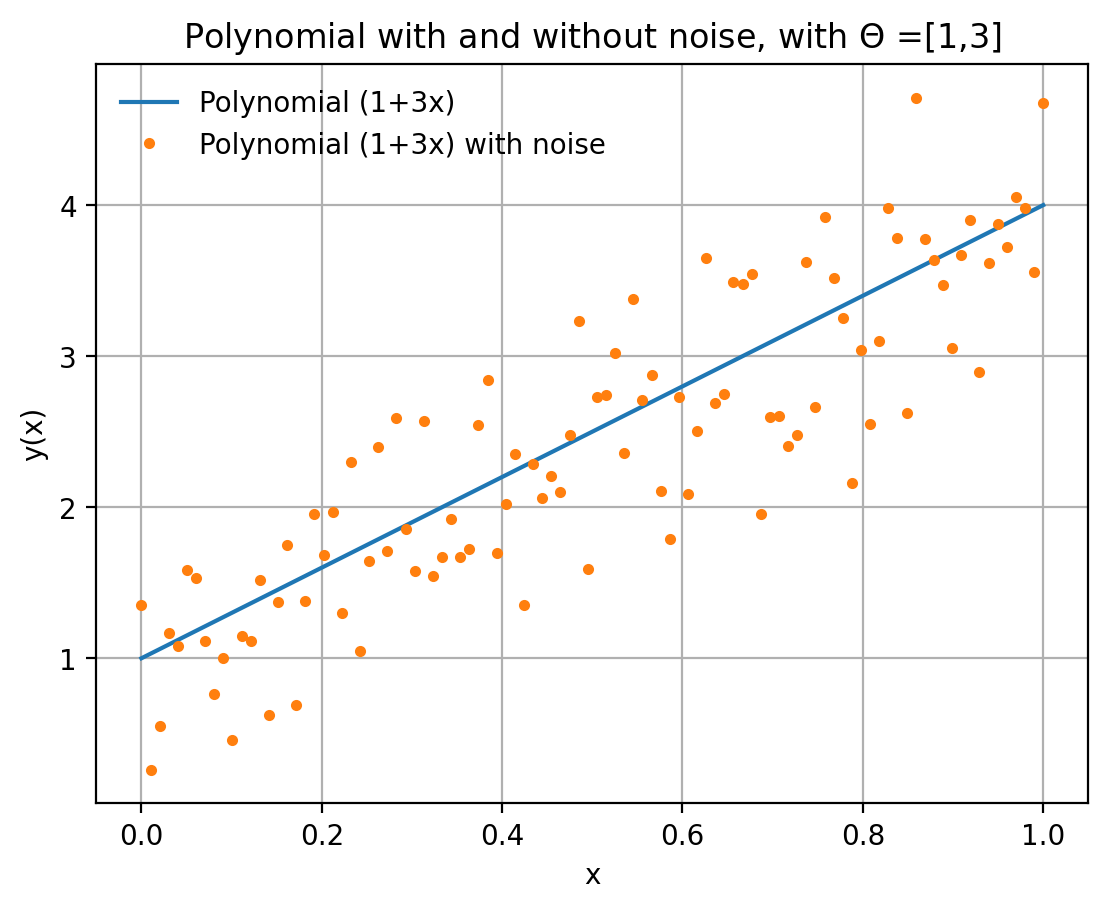

In [33]:
x = np.linspace(0, 1, 100) # Create 100 points evenly spaced
theta = np.array([1, 3])             # Theta array

# Code for plotting
fig, ax = plt.subplots()
ax.plot(x,polyModel(x, theta),label=r"Polynomial (1+3x)") # Plot polynomial
# Plot polynomial with noise as dots
ax.plot(x,polyModelWithNoise(x,theta, 0.5), '.',label=r'Polynomial (1+3x) with noise')
# Add axis labels, titles etc.
ax.set_xlabel("x")
ax.set_ylabel("y(x)")
ax.set_title("Polynomial with and without noise, with $\theta$ =[1,3]")
ax.grid()
ax.legend()

## Gradient Descent method

We can use gradient descent to minimize our $\chi^2$ statistic. This is just a curve-fitting technique, but for a very large dataset, it would require a significant amount of computing power. To address this, we use stochastic gradient descent, which, although slightly less accurate, is much faster.

The stochastic method is faster because it only takes a small batch of randomly sampled data in each iteration during optimization.

You can estimate the gradient of $\chi^2$, now called the cost function, as:

$$\left< \frac{\partial \chi^2}{\partial \theta} \right> \propto \left< \Delta y\right> \frac{\partial y}{\partial \theta} $$

where $\left< \Delta y\right>$ is the mean error between our estimated and true distributions $y(\theta)$.

The right-hand side gives the change in the cost function with respect to changes in $\theta$, which represents our gradient. So we can move from one value of $\theta$ to the next using:

$$ \theta_{i+1} := \theta_i - \eta_i \left< \Delta y\right> \frac{\partial y}{\partial \theta} $$

where $\eta_i$ is the learning rate, which controls how big of a step we take from one value of $\theta$ to the next. Ideally, this value would change over iterations, but for simplicity, we're going to keep it equal to $0.5$, i.e., $\eta = 0.5$.


## Creating Functions

To find the next values of $\theta$, we need the derivative of our polynomial $y(x)$ with respect to $\theta$. As mentioned in the beginning, the equation of the polynomial is given by

$$ y(x) = \sum_i \theta_i x^{i} $$

so when we differentiate this with respect to $\theta_i$
 , we get

$$ \frac{\partial y}{\partial \theta_i} = x^{i}. $$

We're going to create a polyGradient function that will give the gradient as above. It will take an array of
$𝑥$-values and $\theta$ and iterate over $\theta$ to sum them for each
$x$-value to find the gradient at $x$.



In [34]:
def polyGradient(x, theta):
    '''
    Give the gradient of the polynomial with respect to theta coefficient

    Input:
    x - Value or 1D Numpy Array
    Theta - Value or 1D Numpy Array of coefficients

    Output:
    len(theta) by len(x) numpy array of gradients wrt theta
    '''

    gradient = np.zeros((len(theta),len(x))) # Initialse gradient array

    for i in range(len(theta)): # Iterate over theta array
        gradient[i] = x**i

    return gradient

## Stochastic Gradient Descent

For stochastic gradient descent, we take a small batch of values in each iteration. In our case, this will consist of 10 values between 0 and 1. We will have a true parameter of
`[1,4]` and an initial parameter of `[−1,0.5]`.

The equation for mean squared error is:

$$ \textrm{MSE} = \frac{1}{N} \sum_i^N \left( y(x_i;\theta) - \tilde{y} \right)^2 $$
where $\tilde{y}$ is the true distribution that we are trying to describe with $y(x_i;\theta)$.

We're going to find the MSE for each iteration, then plot it after to see if it converges.



In [35]:
# Create Theta Arrays
theta = [-1, 0.5]
thetaTrue = [1,4]
# Initialise constants
sigma = 0.5
learningRate = 0.5
steps = 100
# Create array to store MSE
MSE = np.zeros(steps)

for i in range(steps):
    # Sample 10 numbers between 0 and 1
    x = np.random.uniform(0, 1, 10)
    y_data = polyModelWithNoise(x,thetaTrue, sigma)
    y_model = polyModel(x,theta)
    # Find the difference between the model and real data
    err = y_model - y_data
    # Update theta based on the equation for the next value of theta
    theta -= learningRate*np.average(err*polyGradient(x,theta),axis=1)
    MSE[i] = np.mean(err**2) # Store MSE



## Plot MSE for first order polynomial

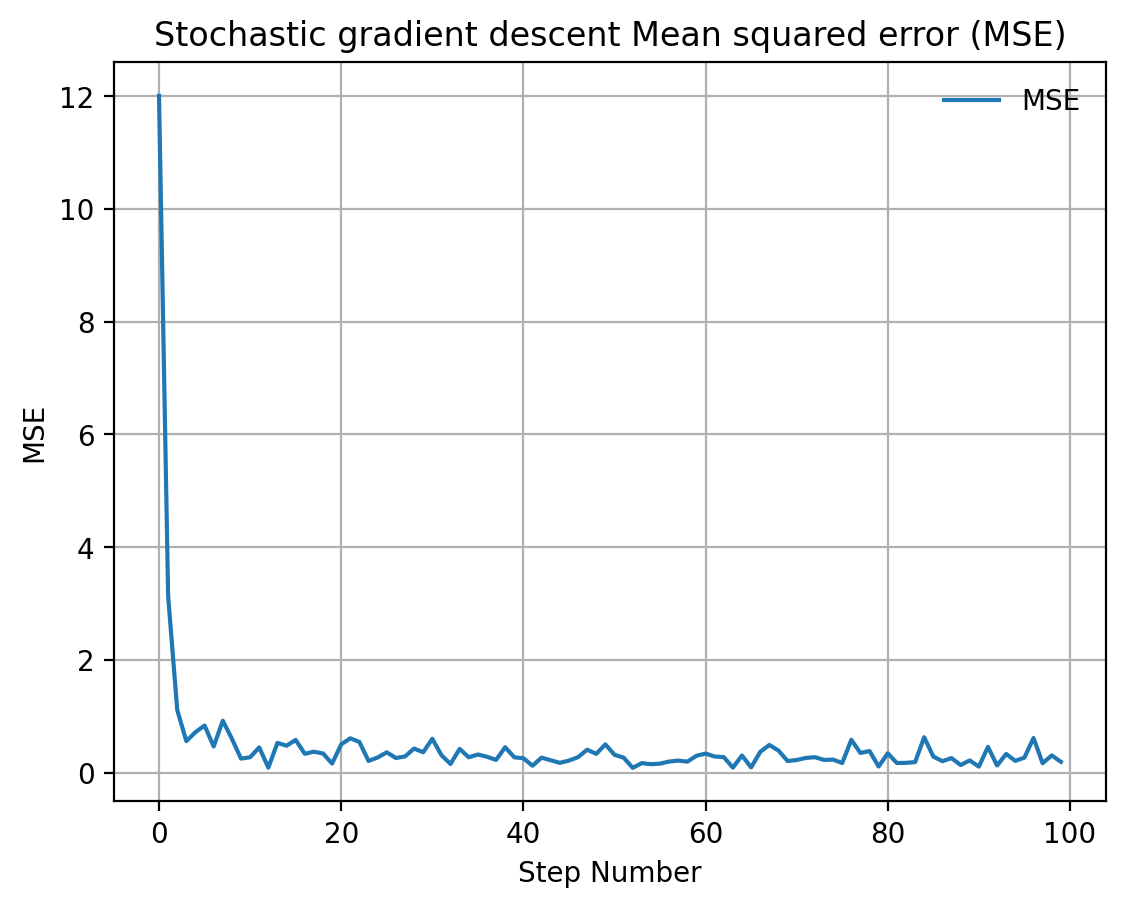

In [36]:
# Plot MSE and label
fig, ax = plt.subplots()
ax.plot(MSE,label=r"MSE")
ax.set_xlabel("Step Number")
ax.set_ylabel("MSE")
ax.set_title("Stochastic gradient descent Mean squared error (MSE)")
ax.grid()
ax.legend()

## Fitting a third order polynomial

Our MSE converged quite nicely for our first-order polynomial. Next, we will try to fit a third-order polynomial with true parameters
$\theta$ = `[1,4,3,2]`. We will attempt to fit this polynomial using first-order, third-order, and seventh-order models, where the $\theta$ arrays will initially start at zero.

We will use our stochastic gradient descent algorithm over the range
0 < $x$ < 1 to update the $\theta$ values. Finally, we will plot the MSEs to observe how well they converge.

In [37]:
# Create 2D arrays to store theta arrays
theta = [np.zeros(2), np.zeros(4), np.zeros(8)]
thetaTrue = [1,4,3,2]
# Initialise parameters
sigma = 0.5
learningRate = 0.5
steps = 100
# Create 2D array to store MSE values
MSE = np.zeros( (len(theta), steps))

for i in range(len(theta)):
    for j in range(steps):

      x = np.random.uniform(0, 1, 10)
      y_data = polyModelWithNoise(x,thetaTrue, sigma)
      y_model = polyModel(x,theta[i])
      err = y_model - y_data

      theta[i] -= learningRate*np.average(err*polyGradient(x,theta[i]),axis=1)
      MSE[i][j] = np.mean(err**2)

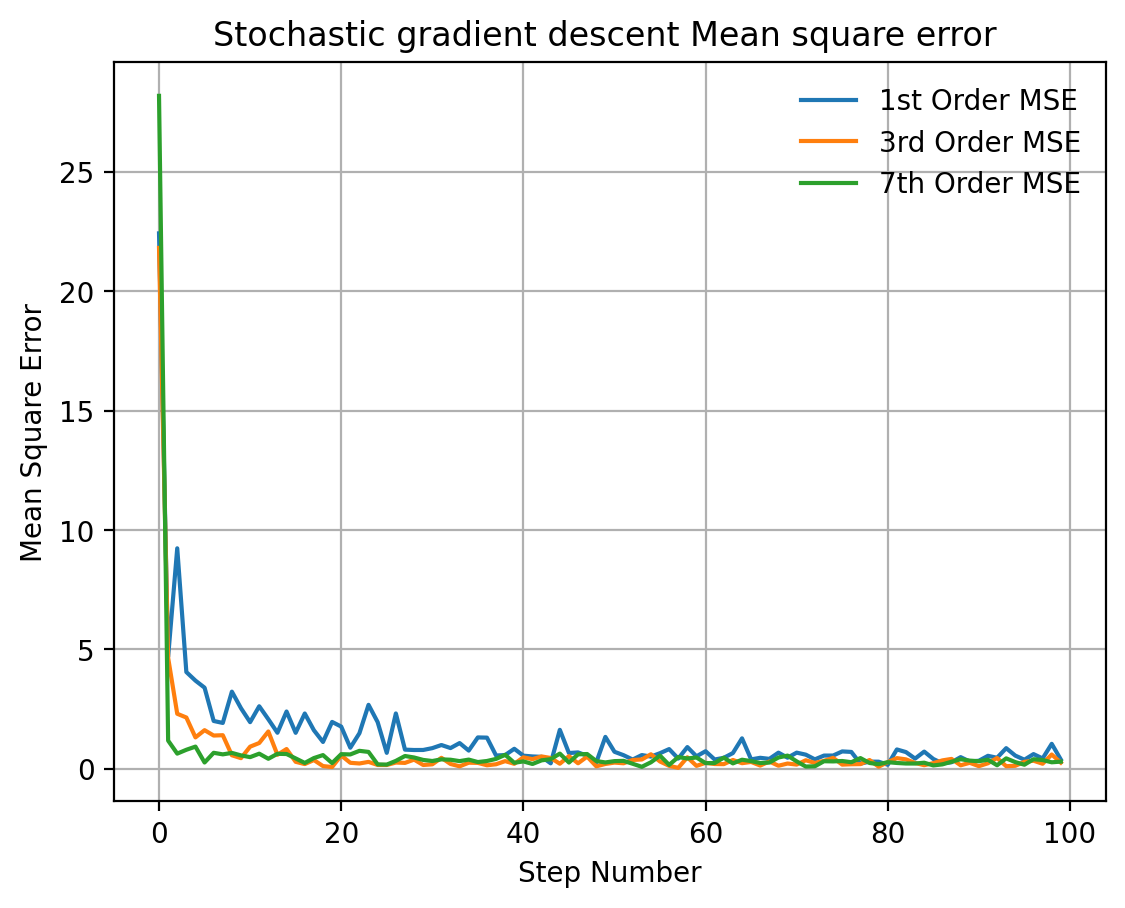

In [38]:
# Plot MSEs
fig, ax = plt.subplots()
ax.plot(MSE[0],label=r"1st Order MSE")
ax.plot(MSE[1],label=r"3rd Order MSE")
ax.plot(MSE[2],label=r"7th Order MSE")
ax.set_xlabel("Step Number")
ax.set_ylabel("Mean Square Error")
ax.set_title("Stochastic gradient descent Mean square error ")
ax.grid()
ax.legend()

## Analysis

The graphs vary slightly each time you rerun the code, but for the most part, they look the same. Looking at the first-order polynomial, we see that it is the most unstable and much more unstable than the third- and seventh-order ones. The third-order polynomial seems the **most stable**, with the seventh-order polynomial being slightly less stable. Overall, the third- and seventh-order polynomials appear to be the best fit for the 0 < $x$ < 1 region.

## Third order polynomial

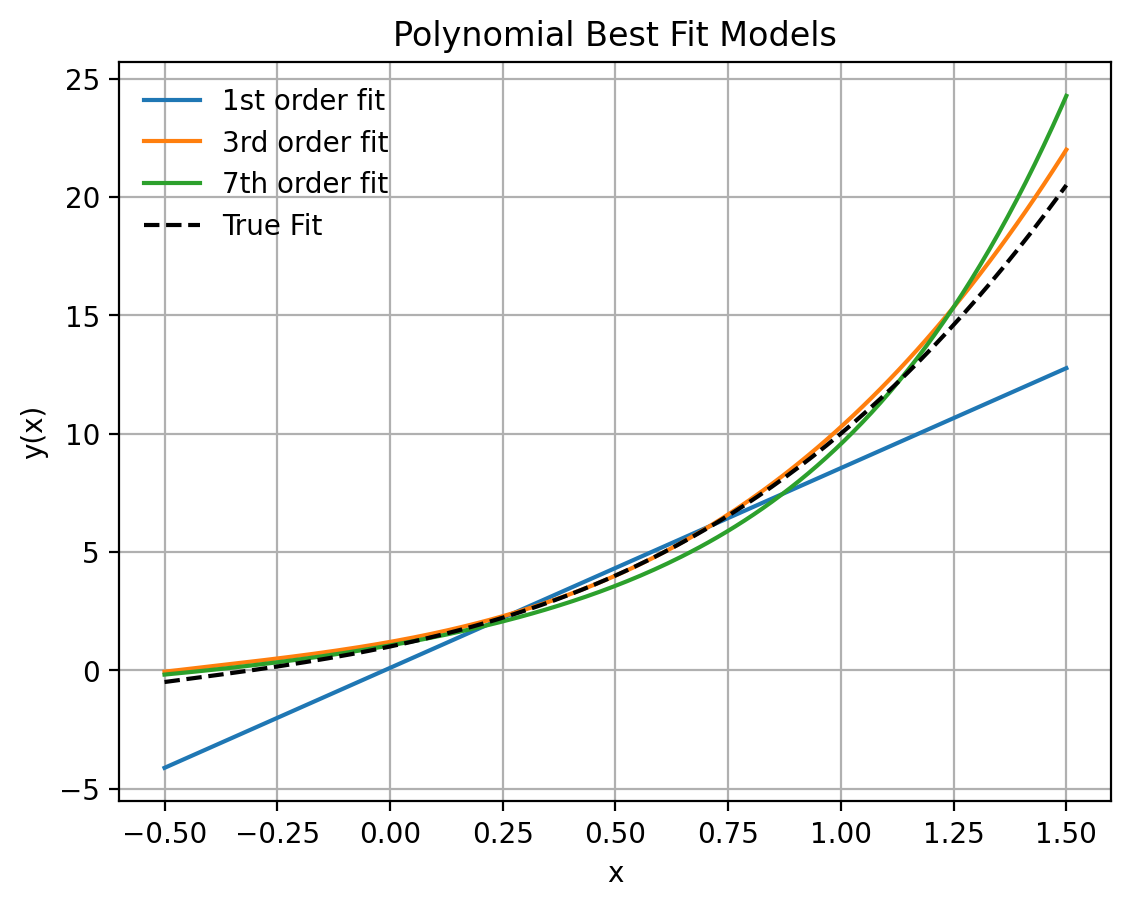

In [39]:
# Create extended Range
x = np.linspace(-0.5, 1.5, 200)
# Plot 1st order, 3rd order and 7th order against the true fit
fig, ax = plt.subplots()
# Create hashmap just to store and access labels easily
orders = {0:'1st', 1:'3rd', 2:'7th'}
for order in orders:
    ax.plot(x,polyModel(x, theta[order]),label=f"{orders[order]} order fit")
# Plot true fit
ax.plot(x,polyModel(x, thetaTrue), '--', color = 'black',
        label=r"True polynomial")
ax.set_xlabel("x")
ax.set_ylabel("y(x)")
ax.set_title("Polynomial Best Fit Models")
ax.grid()
ax.legend()

## Plotting Errors

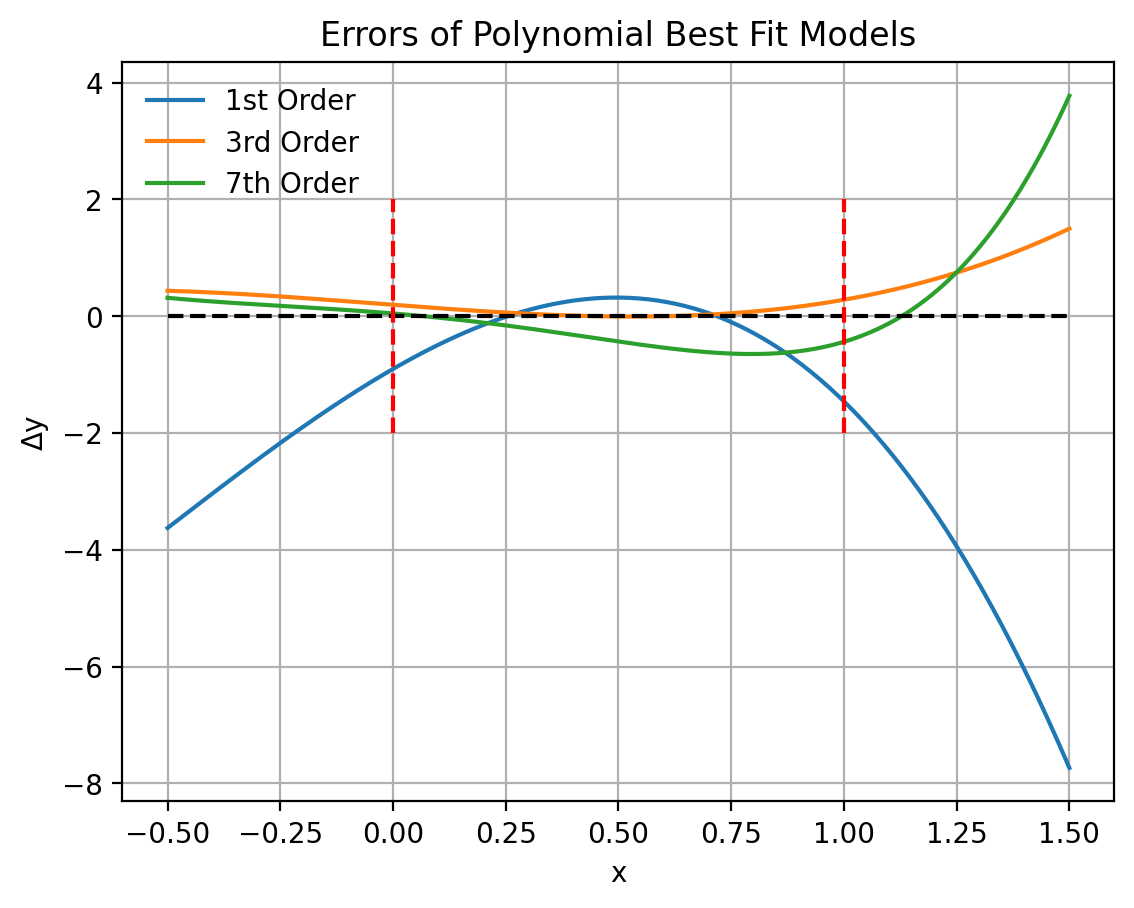

In [40]:
fig, ax = plt.subplots()
# For each order, plot difference between real and estimated polynomials
for order in orders:
    delta_y = polyModel(x, theta[order]) - polyModel(x, thetaTrue)
    ax.plot(x,delta_y,label=f"{orders[order]} Order")
#Plot x axis
ax.plot(x,np.zeros(len(x)), '--', color = 'black')
# Plot verticle lines at boundaries of trained region
y_min = -2    # Start of the vertical line
y_max = 2   # End of the vertical line
ax.plot([0, 0], [y_min, y_max], linestyle='--', color='r')
ax.plot([1, 1], [y_min, y_max], linestyle='--', color='r')

# Labels, legend etc.
ax.set_xlabel("x")
ax.set_ylabel("$\Delta$y")
ax.set_title("Errors of Polynomial Best Fit Models")
ax.grid()
ax.legend()

When we plot our polynomial fits, we can observe how close they are to the true polynomial. From the first graph, we can see that the third-order polynomial provides the best approximation. Additionally, we can plot the error between the fits and the true polynomial. From the error graph, we see that the third-order polynomial has the smallest error and is the most stable, while the seventh-order polynomial is also fairly accurate, supporting the point mentioned previously.

Our fits perform quite well in the trained region of 0 < $x$ < 1, as indicated by the red vertical lines. Beyond the trained region, they begin to diverge, as expected.

## Final Comments

The best polynomial fit was the third-order polynomial, showing the least error when plotted. The first-order polynomial was quite inaccurate, likely due to underfitting the data. The seventh-order polynomial, while not as inaccurate as the first-order polynomial, did not perform as well as the third-order polynomial despite being of a higher order. This is probably due to overfitting.

Regardless, all best-fit models showed a drop in accuracy when exiting the trained regions. In the trained regions, the
𝜃
θ values were adjusted by the gradient descent algorithm to align more closely with the true polynomial.

The entire notebook takes about 3 seconds to run, with the block running the gradient descent algorithm taking less than a second. Most of the computations in the blocks are nearly instantaneous, with the runtime primarily attributed to overhead from the software we are using.

If we have
$𝑛$
n data points and want to find the minimum gradient using the traditional gradient descent method, it would require
$𝑛$
n computations to take the correct step in the correct direction at any point, resulting in a time complexity of $O(n)$. In contrast, stochastic gradient descent takes a step in a random direction, which has a time complexity of $O(1)$. While the random step does not directly target the correct direction, performing many such steps almost guarantees finding a minimum, especially when using a batch of points.

Stochastic gradient descent is particularly useful for large datasets where $n$ is very large, as computing the gradient at each step would be computationally expensive. Additionally, it addresses the issue of local minima, a challenge for traditional gradient descent algorithms. The advantages of stochastic gradient descent are evident in our notebook, which runs efficiently despite the (somewhat) large dataset and encounters no issues with local minima.